In [1]:
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

In [2]:
from tensorflow.keras.applications.vgg16 import decode_predictions
from keras.models import Model

In [3]:
from matplotlib import pyplot as plt

In [4]:
model = VGG16(weights='imagenet')

In [5]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

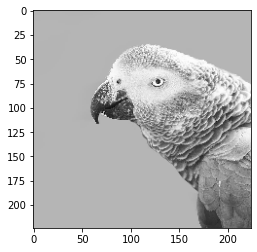

In [6]:
img_path = 'images/parrot.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)

In [7]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

result = model.predict(x)

print(decode_predictions(result))

[[('n01817953', 'African_grey', 0.9998461), ('n01616318', 'vulture', 8.102778e-05), ('n01622779', 'great_grey_owl', 3.4133835e-05), ('n01608432', 'kite', 1.9110023e-05), ('n01819313', 'sulphur-crested_cockatoo', 7.76558e-06)]]


In [15]:
feat_model = Model(inputs = model.input, outputs = [model.get_layer('block3_pool').output,model.get_layer('block4_pool').output])
feats = feat_model.predict(x)
print(feats[1].shape)

(1, 28, 28, 256)
